In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read and preprocess data
df = pd.read_csv('../data/AllSeasonsM2Q2.csv')
df = df.drop(['Unnamed: 0', 'index'], 1).reset_index(drop=True)
# df = df[['distance', 'angle', 'Goal']]
df = df.rename({'Goal': 'is_goal'}, axis=1)
df = df[~(df['is_goal'].isnull() | df['distance'].isnull() | df['angle'].isnull())] #remove after fix: still some null  distances + does computing distance take into consideration the rink side
df['is_goal'] = df['is_goal'].astype(np.int64)
df.head()

,eventType,period,periodTime,periodType,gameID,teamOfShooter,homeOrAway,xCoord,yCoord,shooter,...,emptyNet,strength,season,rinkSide,gameType,totalPlayTime,is_goal,EmptyNet,distance,angle
0,Shot,1,01:11,REGULAR,2016020001,Toronto Maple Leafs,away,-77.0,5.0,Mitchell Marner,...,NaN,NaN,2016,right,R,01:00:37,0,0,13.000000,67.380135
1,Shot,1,02:53,REGULAR,2016020001,Ottawa Senators,home,86.0,13.0,Chris Kelly,...,NaN,NaN,2016,left,R,01:00:37,0,0,13.341664,167.005383
2,Shot,1,04:01,REGULAR,2016020001,Ottawa Senators,home,23.0,-38.0,Cody Ceci,...,NaN,NaN,2016,left,R,01:00:37,0,0,76.157731,60.068488
3,Shot,1,04:46,REGULAR,2016020001,Ottawa Senators,home,33.0,-15.0,Erik Karlsson,...,NaN,NaN,2016,left,R,01:00:37,0,0,57.974132,75.004921
4,Shot,1,06:46,REGULAR,2016020001,Toronto Maple Leafs,away,-34.0,28.0,Martin Marincin,...,NaN,NaN,2016,right,R,01:00:37,0,0,61.717096,63.019769


### Question-1: plots

In [3]:
df_goals = df[df['is_goal']==1]
df_nongoals = df[df['is_goal']==0]

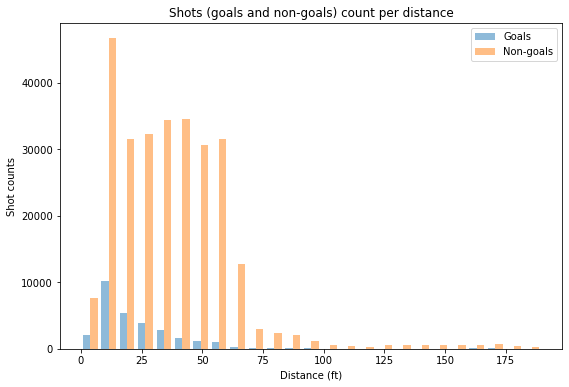

In [4]:
goals_distance = df_goals['distance'].to_numpy()
nongoals_distance = df_nongoals['distance'].to_numpy()

plt.figure(figsize=(9, 6))
plt.hist([goals_distance, nongoals_distance], bins=25, alpha=0.5, label=['Goals', 'Non-goals'])
plt.ylabel('Shot counts')
plt.xlabel('Distance (ft)')
plt.legend(loc='upper right')
plt.title('Shots (goals and non-goals) count per distance')
plt.show()

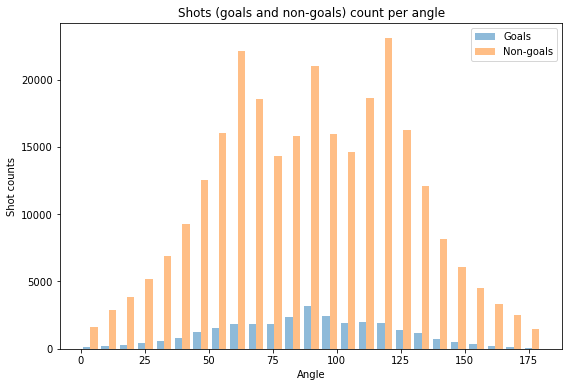

In [5]:
goals_angle = df_goals['angle'].to_numpy()
nongoals_angle = df_nongoals['angle'].to_numpy()

plt.figure(figsize=(9, 6))
plt.hist([goals_angle, nongoals_angle], bins=25, alpha=0.5, label=['Goals', 'Non-goals'])
plt.ylabel('Shot counts')
plt.xlabel('Angle')
plt.legend(loc='upper right')
plt.title('Shots (goals and non-goals) count per angle')
plt.show()

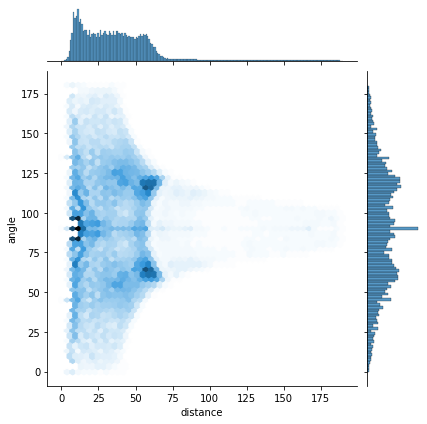

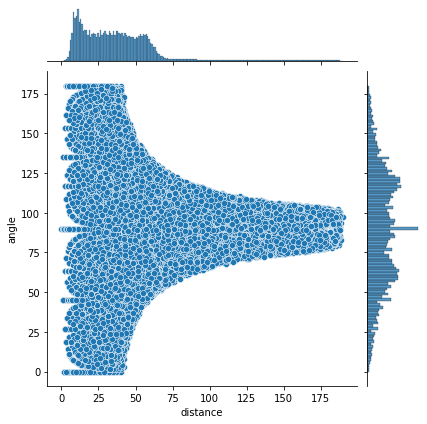

In [6]:
# option 1
sns.jointplot(data=df, x="distance", y="angle", bins=100, kind='hex')
plt.show()

# option 2
sns.jointplot(data=df, x="distance", y="angle")
plt.show()

### Question-2

In [7]:
df_goal_rate_per_distance = df.copy()
df_goal_rate_per_distance['distance1ft'] = df_goal_rate_per_distance['distance'].round() 
df_goal_rate_per_distance = df_goal_rate_per_distance.groupby('distance1ft')['is_goal'].mean().reset_index(name='goal_rate')
display(df_goal_rate_per_distance.head())

,distance1ft,goal_rate
0,0.0,1.000000
1,1.0,0.846154
2,2.0,0.560000
3,3.0,0.389262
4,4.0,0.307902


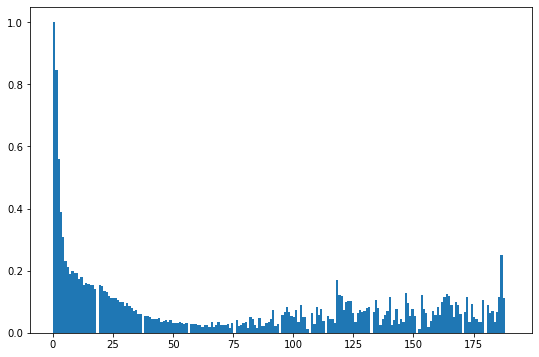

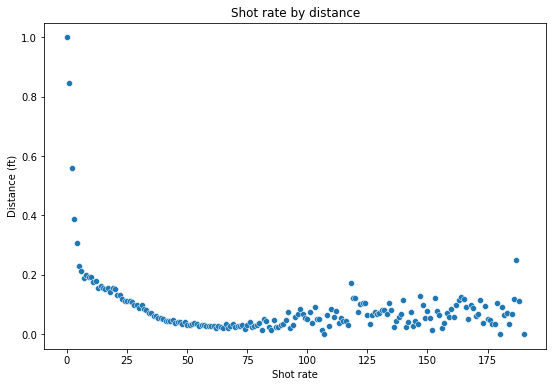

In [8]:
#option 1
plt.figure(figsize=(9, 6))
plt.hist(df_goal_rate_per_distance['distance1ft'], weights=df_goal_rate_per_distance['goal_rate'], bins=200)
plt.show()

# option 2
plt.figure(figsize=(9, 6))
sns.scatterplot(x="distance1ft", y="goal_rate", data=df_goal_rate_per_distance, palette="muted")
plt.title('Shot rate by distance')
plt.xlabel('Shot rate')
plt.ylabel('Distance (ft)')
plt.show()

In [9]:
df_goal_rate_per_distance = df.copy()
df_goal_rate_per_distance['angle1deg'] = df_goal_rate_per_distance['angle'].round() 
df_goal_rate_per_distance = df_goal_rate_per_distance.groupby('angle1deg')['is_goal'].mean().reset_index(name='goal_rate')
display(df_goal_rate_per_distance.head())

,angle1deg,goal_rate
0,0.0,0.093294
1,1.0,0.000000
2,2.0,0.021127
3,3.0,0.075949
4,4.0,0.063636


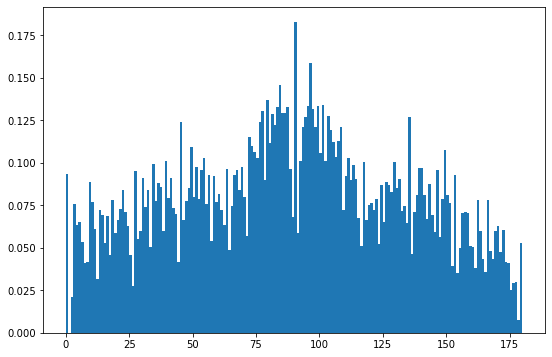

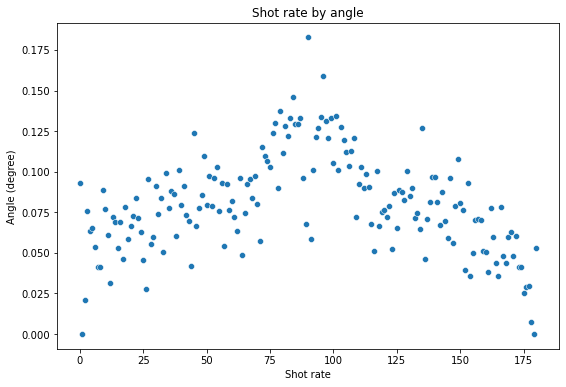

In [10]:
#option 1
plt.figure(figsize=(9, 6))
plt.hist(df_goal_rate_per_distance['angle1deg'], weights=df_goal_rate_per_distance['goal_rate'], bins=180)
plt.show()

# option 2
plt.figure(figsize=(9, 6))
sns.scatterplot(x="angle1deg", y="goal_rate", data=df_goal_rate_per_distance, palette="muted")
plt.title('Shot rate by angle')
plt.xlabel('Shot rate')
plt.ylabel('Angle (degree)')
plt.show()

### Question-3

In [11]:
df_dist_net_goals = df_goals[['distance', 'EmptyNet']]

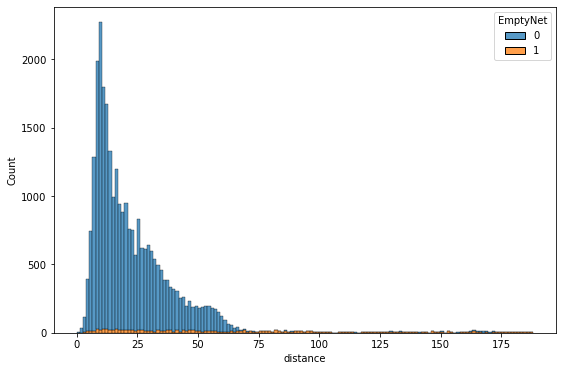

In [12]:
plt.figure(figsize=(9, 6))

sns.histplot(data=df_dist_net_goals, x="distance", hue="EmptyNet", multiple="stack")

plt.show()

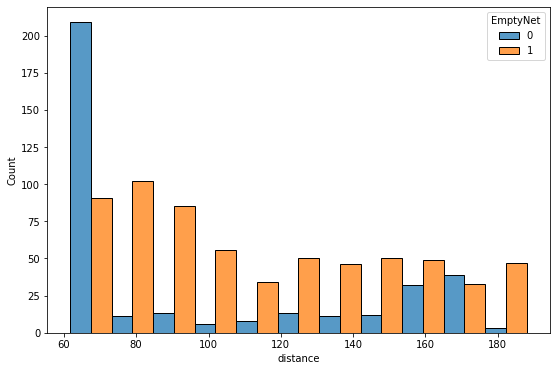

In [16]:
df_dist_net_goals2 = df_dist_net_goals.sort_values('distance')[-1000:]

plt.figure(figsize=(9, 6))

sns.histplot(data=df_dist_net_goals2, x="distance", hue="EmptyNet", multiple="dodge")

plt.show()

#### Identify an event with incorrect features

In [14]:
df_dist_net_goals2[df_dist_net_goals2['EmptyNet']==0].tail()

,distance,EmptyNet
202252,175.385290,0
33988,176.011363,0
191917,176.918060,0
36180,178.339564,0
30946,187.181730,0


In [15]:
df.loc[30946]

eventType                    Goal
period                          2
periodTime                  10:27
periodType                REGULAR
gameID                 2016020510
teamOfShooter    Florida Panthers
homeOrAway                   home
xCoord                      -97.0
yCoord                       21.0
shooter           Derek MacKenzie
goalie               Jared Coreau
shotType                Slap Shot
emptyNet                    False
strength                     Even
season                       2016
rinkSide                     left
gameType                        R
totalPlayTime            01:05:00
is_goal                         1
EmptyNet                        0
distance                187.18173
angle                     96.4416
Name: 30946, dtype: object